1-	Gray-scale bir görüntü için histogram oluşturan Python kodunu yazıp, washedPolen.tif  ve building.tif görüntüleri için test ediniz.

In [299]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.exposure import histogram

In [430]:
%matplotlib inline

In [300]:
def hist_grayvalues(image_path):
    image = io.imread(image_path)

    hist , histCenters = histogram(image)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')

    axes[1].plot(histCenters, hist)
    axes[1].set_title("histogram of {} gray values".format(image_path.split('/')[-1]))

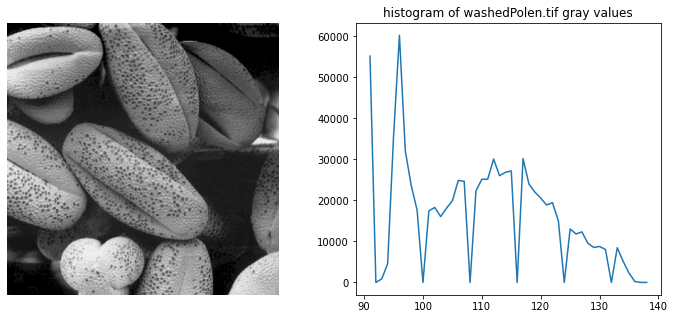

In [301]:
hist_grayvalues("TestImages/washedPolen.tif")

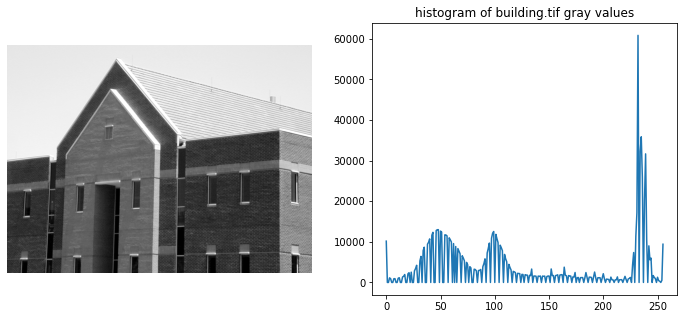

In [302]:
hist_grayvalues("TestImages/building.tif")

2-	Aydınlatma problemi olan görüntüler için kullanılan “histogram equalization” işlemi için python kodu yazarak washedPolen.tif  ve building.tif görüntüleri için test ediniz. Giriş görüntüsü ve çıkış görüntüsü için ayrı ayrı histogramları inceleyerek yorum yapınız.

In [431]:
from skimage import exposure

In [432]:
def hist_equalize(image_path):
    image = io.imread(image_path)
    
    img_rescale = exposure.equalize_hist(image)
    hist , histCenters = histogram(img_rescale)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].imshow(img_rescale, cmap='gray')
    axes[0].axis('off')

    axes[1].plot(histCenters, hist)
    axes[1].set_title("histogram of {} histogram equalization gray values".format(image_path.split('/')[-1]))

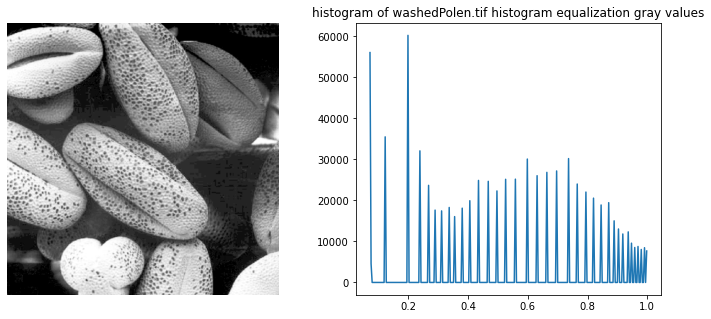

In [433]:
hist_equalize("TestImages/washedPolen.tif")

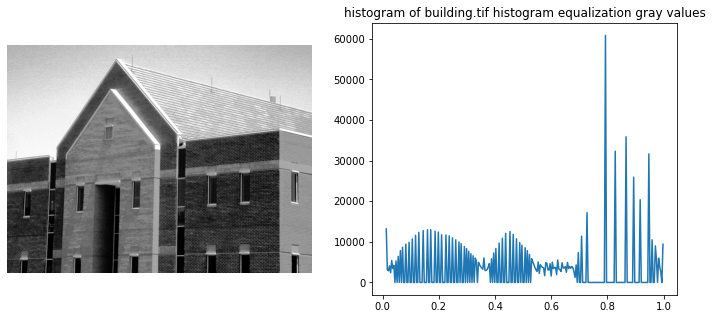

In [434]:
hist_equalize("TestImages/building.tif")

washedPolen.tif görüntüsünün parlaklık değerleri 1. sorunun altında görüldüğü üzere 90-140 arasındadır. Görece düşük kontrastlı bir görüntü diyebiliriz. Bu sorunu gidermek için 2. soruda oluşturulan hist_equalize fonksiyonunu kullanabiliriz. Bu fonksiyon sıkışık parlaklık değerlerini 0-255 arasında açma işlemi uygulayarak daha ideal görüntü elde etmemizi sağlar. Fonksiyon uygulandıktan sonraki washedPolen.tif görüntüsünün kontrastlığı artmıştır. Histogram equalization işlemi uygulanan building.tif görüntüsünün parlaklık değerleri 0-255 arasındadır. Bu görüntüde 230-250 arasındaki parlaklık değerlerinin diğer değerlere göre çok daha fazla frekansa sahip olduğu görülmüştür. hist_equalize fonksiyonu uygulandığında 230-250 arasındaki parlaklık değerleri belli bir aralıkta genişletilmiş ancak orijinal görüntüye bir katkı sağlamamıştır. Buradan histogram equalization işleminin parlaklık değerlerinin belli bir aralıkta olan görüntülerde kontrastlığı artırmada kullanılabilecek bir işlem olduğunu anlayabiliriz.

3-	” Laplacian of Gaussian (Log)” filtre katsayılarını üç farklı sigma değeri için (hazır kod kullanmaksızın) oluşturunuz. Filter katsayıları toplamı 1 olacak şekilde normalize ediniz. Elde ettiginiz farklı boyutlardaki maskeleri kullanarak konvolüsyon işlemini “ndi.convolve”  fonksiyonunu kullanarak  gerçekleştiriniz.

In [255]:
import scipy.ndimage as ndi
from scipy.special import softmax
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math

In [407]:
def LOG_filter(sigma,plot=False,sum1=True):
    if plot==True:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        # Make data.
        X = np.arange(-8, 9, 0.5)
        Y = np.arange(-8, 9, 0.5)
        X, Y = np.meshgrid(X, Y)
        R = (X**2 + Y**2)
        delta = ((R - 2*sigma**2)/sigma**4)*np.exp(-R/(2*sigma**2))

        surf = ax.plot_surface(X, Y, -delta, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
    else:
        X = np.arange(-5, 6, 1)
        Y = np.arange(-5, 6, 1)
        X, Y = np.meshgrid(X, Y)
        R = (X**2 + Y**2)
        delta = ((R - 2*sigma**2)/sigma**4)*np.exp(-R/(2*sigma**2))
        if sum1==True:
            return softmax(-delta)
        else:
            return -delta

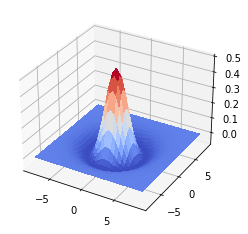

In [408]:
LOG_filter(2,plot=True)

In [409]:
LOG_filter(3).sum() #katsayılar istenildiği gibi 1 yapmaktadır

1.0

In [410]:
import scipy.ndimage as ndi
from skimage import data
image = data.camera()

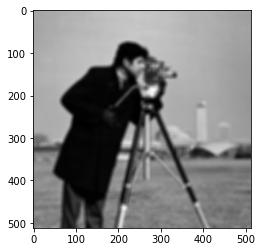

In [437]:
filtered1 = ndi.convolve(image, LOG_filter(1)) #sigma equal 1
plt.imshow(filtered1,cmap="gray")

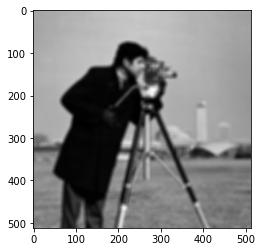

In [438]:
filtered2 = ndi.convolve(image, LOG_filter(1)) #sigma equal 1
plt.imshow(filtered2,cmap="gray")

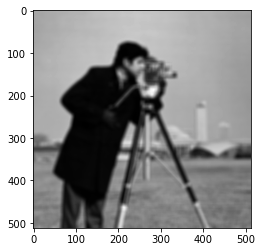

In [439]:
filtered3 = ndi.convolve(image, LOG_filter(2)) #sigma equal 2
plt.imshow(filtered3,cmap="gray")

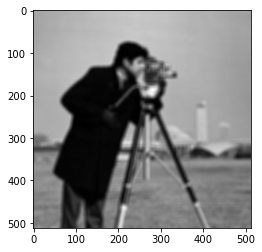

In [440]:
filtered4 = ndi.convolve(image, LOG_filter(3)) #sigma equal 3
plt.imshow(filtered4,cmap="gray")

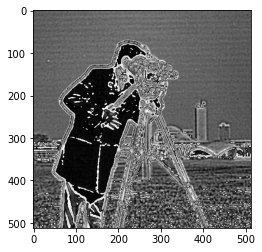

In [441]:
filtered5 = ndi.convolve(image, LOG_filter(2,sum1=False)) #sigma equal 3 but normalization not applied
plt.imshow(filtered5,cmap="gray")

Zero Crossing kenar algılamak için kullanılır. Bir gradyan filtresi , piksel değerindeki hızlı değişim alanlarını arayan bir filtredir.

In [499]:
import scipy.ndimage as ndi
from skimage import filters
import math
def zerocrossing(image,sigma):
    image = io.imread(image)
    plt.imshow(image,cmap='gray')

    horizontal_kernel = np.array([
    [1, 0,- 1],
    [1, 0, -1],
    [1, 0, -1]
    ])
    

    k=1/(math.sqrt(2*math.pi)*2)
    smooth=k*np.exp(-(image*image)/(2*sigma**2))

    
    gradient_horizontal = ndi.convolve(smooth.astype(float),
                                    horizontal_kernel)



    fig, ax = plt.subplots()
    ax.imshow(gradient_horizontal,cmap='gray');

    vertical_kernel = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
    ])

    gradient_vertical = ndi.convolve(smooth.astype(float),
                                    vertical_kernel)
    fig, ax = plt.subplots()
    ax.imshow(gradient_vertical,cmap='gray')

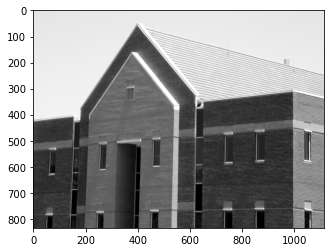

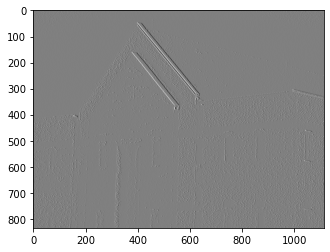

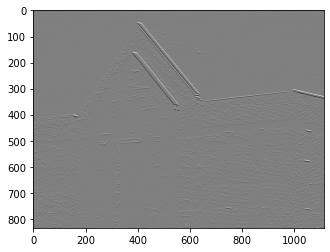

In [500]:
zerocrossing('TestImages/building.tif',2)

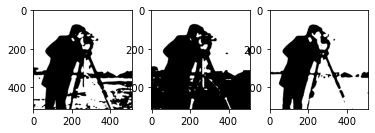

In [488]:
plt.subplot(1, 3, 1)
plt.imshow(filtered2>filtered2.mean(), cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(filtered2>filtered2.mean()+25, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(filtered2>filtered2.mean()-25, cmap='gray')

camera görüntüsüne 1 sigma değeri için log filtresi uygulanmış ve farklı değerler kullanılarak binary görüntüye çevirilmiştir. Burada camera görüntüsü ortalamanın 25 birim altı için diğerlerine göre daha belirgin bir şekilde görüntülenmiştir.

4-	4-komşuluk ve 8-komşuluk ilişkisini ayrı ayrı  inceleyerek bağlantılı bileşenleri etiketleyen ‘Recursive connected component labeling’ algoritmasını  yazınız. Etiketlenmiş bölgeleri gösteren görüntü dosyasını pgm formatında kaydediniz. 

In [102]:
from skimage.color import rgb2lab

In [64]:
def recursive_connected_components(B,N):
    """
    B Binary matris
    X Neighbours
    """
    LB=-B
    label=0
    find_components(LB,label,N)
    print(LB)
    
def find_components(LB,label,N):
    for L in range(len(LB)):
        for P in range(len(LB[0])):
            if LB[L,P]==-1:
                label+=1
                search(LB,label,L,P,N)
        
def search(LB,label,L,P,N):
    LB[L,P]=label
    if N==4:
        Nset=[(L,P-1),(L,P+1),(L+1,P),(L-1,P)]
    elif N==8:
        Nset=[(L,P-1),(L,P+1),(L+1,P),(L-1,P),(L+1,P-1),(L+1,P+1),(L-1,P-1),(L-1,P-1)]
    else:
        raise ValueError("N must be 4 or 8")
    for i in Nset:
        if LB[i]==-1:
            return search(LB,label,i[0],i[1],N)
        
recursive_connected_components(B,4)

[[0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0]
 [0 3 0 4 0 2 0]
 [0 3 3 0 0 2 0]
 [0 0 0 0 0 0 0]]


In [420]:
#example 1
B=np.array([[0,0,0,0,0,0,0],
           [0,0,1,0,0,1,0],
           [0,1,0,1,0,1,0],
           [0,1,1,0,0,1,0],
           [0,0,0,0,0,0,0]])
recursive_connected_components(B,4)

[[0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0]
 [0 3 0 4 0 2 0]
 [0 3 3 0 0 2 0]
 [0 0 0 0 0 0 0]]


In [422]:
#example 2
B=np.array([[0,0,0,0,0,0,0],
           [0,0,0,0,1,1,0],
           [0,0,0,1,0,1,0],
           [0,1,1,1,0,1,0],
           [0,0,0,0,0,0,0]])
recursive_connected_components(B,4)

[[0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0]
 [0 0 0 2 0 1 0]
 [0 2 2 2 0 1 0]
 [0 0 0 0 0 0 0]]


In [429]:
#example 3
B=np.array([[0,0,0,0,0,0,0],
           [0,0,0,1,1,0,0],
           [0,1,0,0,0,1,0],
           [0,1,1,1,0,1,0],
           [0,0,0,0,0,0,0]])
recursive_connected_components(B,8)

[[0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0]
 [0 2 0 0 0 1 0]
 [0 2 2 2 0 1 0]
 [0 0 0 0 0 0 0]]


Algoritma recursive olduğu için -1 değeri bulduğunda komşularına bakıp -1 değerini arayacak ve bulduğunda o komşuya giderek aynı etiketi atayacaktır. Hafıza bakımından yer tutsa da recursive olmayan bir algoritmaya göre her çok hızlı çalışacaktır. Çünkü while ya da for döngüsünde komşuluklar tekrar tekrar kontrol edilecek ve ona göre işlem ilerleyecektir. Bu da bu fonksiyonun diğer fonksiyonlara göre çok daha avantajlı olduğunu gösterir.


In [481]:
#io.imsave("labirent.pgm",recursive_connected_components(B))

yukarıdaki fonksiyon kullanılarak görüntü kaydedilecektir. Fonksiyonu bu görüntüde çalıştıramadığım için o adımları gösteremedim

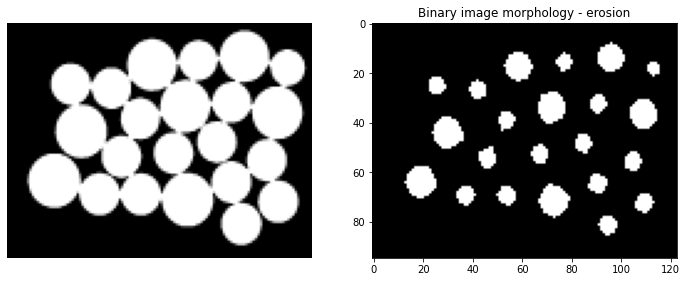

In [160]:
from skimage.filters import threshold_mean
from skimage.morphology import disk
from skimage.morphology import erosion

def funct(image_path,diameter):
    image = cv2.imread(image_path)
    imagegray = rgb2gray(image)

    ss = disk(diameter/2)

    erosioned = binary_erosion(imagegray ,ss)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].imshow(image ,cmap='gray')
    axes[0].axis('off')

    axes[1].imshow(erosioned,cmap='gray')
    axes[1].set_title("Binary image morphology - erosion")
    
funct("20-21 Odev-1/coins.pgm",11)

kullanılan fonksiyon farklı paraları saymada yeterli olmuştur. Burada paraları saymak için recursive_connected_components adlı fonksiyonumuzu kullanıp label değişkenine bakarak kaç tane para olduğunu rahatlıkla bulabiliriz.